In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import seaborn as sns
data = pd.read_csv('diabetes.csv')
data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,80,1
1,85,66,29,0,26.6,0.351,61,0
2,183,64,0,0,23.3,0.672,62,1
3,89,66,23,94,28.1,0.167,81,0
4,137,40,35,168,43.1,2.288,63,1


In [2]:
data.shape

(768, 8)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 48.1 KB


In [4]:
data.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,64.959635,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.101860,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,52.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,55.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,62.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,73.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,90.000000,1.000000


In [5]:
data.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
X=data.iloc[:,:7].values
y=data.iloc[:,7].values

In [7]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.40,random_state=0) 
len(x_test)

308

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
classifier = KNeighborsClassifier(n_neighbors = 9)
#training the classifier
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [9]:
#making precdictions
y_pred = classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [10]:
#to evaluate the quality of the output
print(confusion_matrix(y_test, y_pred))


[[183  22]
 [ 54  49]]


In [11]:
#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.89      0.83       205
           1       0.69      0.48      0.56       103

    accuracy                           0.75       308
   macro avg       0.73      0.68      0.70       308
weighted avg       0.74      0.75      0.74       308



In [12]:
#Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test)*100)


accuracy is 75.32467532467533


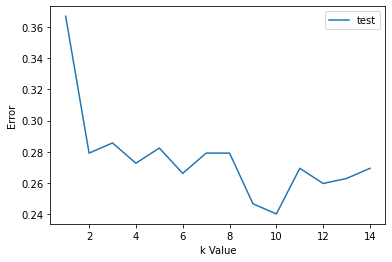

In [13]:
# Finding the value of k using SQRT method
import numpy as np
import matplotlib.pyplot as plt
error2= []
for k in range(1,15):
 classifier=KNeighborsClassifier(n_neighbors=k)
 classifier.fit(x_train,y_train)
 y_pred2= classifier.predict(x_test)
 error2.append(np.mean(y_test!= y_pred2))
plt.plot(range(1,15),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()
#Visualizing Confusion matrix


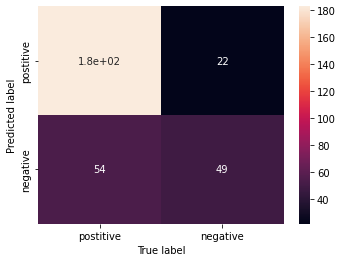

In [14]:
#Visualizing Confusion matrix
import seaborn as sns   
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,index = ['postitive','negative'], columns = ['postitive','negative'])
plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.ylabel('Predicted label')
plt.xlabel('True label')
plt.show()

In [17]:
#GUI for calculating that the person is suffering from Diabetes or not
from tkinter import *
import tkinter.messagebox as mBox

root=Tk()
root.title("Diabetes prediction")
root.geometry('500x700')
label1=Label(root,text="Diabetes calculator",font=(7))
label1.place(x=170,y=10)
frame=Frame(root)
frame.pack()

def bmiage():
    gluco=txt1.get()
    bp=txt2.get()
    skt=txt3.get()
    ins=txt4.get()
    bmi=txt5.get()
    dpf=txt6.get()
    age=txt7.get()
    ablist=[[float(gluco),float(bp),float(skt),float(ins),float(bmi),float(dpf),int(age)]]
    if classifier.predict(ablist)[0]==1:
        str1="Is Diabetic \n1. Choose healthier carbohydrates \n2. Eat less salt \n3. Eat less red and processed meat \n4. Eat more fruit and veg \n5. Choose healthier fats"
        Label2=Label(root,text=str1,bd=2,bg='red',fg='white',width=40,font=(5))
        Label2.place(x=20,y=390)
    else:
        str2="Is not Diabetic but you should take good diet"     
        Label3=Label(root,text=str2,bd=2,bg='lightgreen',fg='black',width=40,font=(5))
        Label3.place(x=20,y=390)
        
Label_i=Label(root,text="* indicate range",fg="red",font=(7))   
Label_i.place(x=100,y=50)  

Label_1=Label(root,text="Enter Glucose",font=(7))   
Label_1.place(x=20,y=150)
Label_1r=Label(root,text="*0-200",fg="red")   
Label_1r.place(x=300,y=150)
Label_2=Label(root,text="Enter BP",font=(7))   
Label_2.place(x=20,y=180)
Label_2r=Label(root,text="*80-190",fg="red")   
Label_2r.place(x=300,y=180)
Label_3=Label(root,text="Enter Skin Thickness",font=(7))   
Label_3.place(x=20,y=210)
Label_3r=Label(root,text="0-50",fg="red")   
Label_3r.place(x=300,y=210)
Label_4=Label(root,text="Enter Insuline",font=(7))   
Label_4.place(x=20,y=240)
Label_4r=Label(root,text="0-330",fg="red")   
Label_4r.place(x=300,y=240)
Label_5=Label(root,text="Enter BMI",font=(7))   
Label_5.place(x=20,y=270)
Label_5r=Label(root,text="0-50",fg="red")   
Label_5r.place(x=300,y=270)
Label_6=Label(root,text="Enter DPF",font=(7))   
Label_6.place(x=20,y=300)
Label_6r=Label(root,text="0.000-9.999",fg="red")   
Label_6r.place(x=300,y=300)
Label_7=Label(root,text="Enter Age",font=(7))   
Label_7.place(x=20,y=330)
Label_7r=Label(root,text="*65-100",fg="red")   
Label_7r.place(x=300,y=330)

Labeln=Label(root,text="Name",font=(7))   
Labeln.place(x=20,y=90)
Labels=Label(root,text="sex",font=(7))   
Labels.place(x=20,y=120)
Label_1r=Label(root,text="male or female")   
Label_1r.place(x=300,y=120)
txtn=Entry(root,width=20,font=(7))
txtn.place(x=180,y=90)
txts=Entry(root,width=10,font=(7))
txts.place(x=180,y=120)

txt1=Entry(root,width=10,font=(7))
txt1.place(x=180,y=150)
txt2=Entry(root,width=10,font=(7))
txt2.place(x=180,y=180)
txt3=Entry(root,width=10,font=(7))
txt3.place(x=180,y=210)
txt4=Entry(root,width=10,font=(7))
txt4.place(x=180,y=240)
txt5=Entry(root,width=10,font=(7))
txt5.place(x=180,y=270)
txt6=Entry(root,width=10,font=(7))
txt6.place(x=180,y=300)
txt7=Entry(root,width=10,font=(7))
txt7.place(x=180,y=330)


button=Button(root,text="Result",command=bmiage,font=(7))
button.place(x=150,y=360)

root.mainloop()